In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as ntx

In [2]:
#file_input="input_test.txt"
file_input="input.txt"

In [3]:
with open(file_input,'r') as f:
    lines = f.readlines()

In [4]:
lines

['Valve QE has flow rate=3; tunnels lead to valves OU, ME, UX, AX, TW\n',
 'Valve TN has flow rate=16; tunnels lead to valves UW, CG, WB\n',
 'Valve UX has flow rate=0; tunnels lead to valves AA, QE\n',
 'Valve HK has flow rate=5; tunnels lead to valves HT, QU, TW, WV, OK\n',
 'Valve SK has flow rate=14; tunnels lead to valves GH, GA, XM\n',
 'Valve HY has flow rate=0; tunnels lead to valves LG, AA\n',
 'Valve BK has flow rate=0; tunnels lead to valves SZ, AA\n',
 'Valve BY has flow rate=11; tunnels lead to valves SP, HS, DN, KD, TK\n',
 'Valve GR has flow rate=0; tunnels lead to valves FE, OK\n',
 'Valve OH has flow rate=0; tunnels lead to valves BM, KE\n',
 'Valve DC has flow rate=0; tunnels lead to valves AX, XH\n',
 'Valve YS has flow rate=0; tunnels lead to valves XH, EU\n',
 'Valve KP has flow rate=0; tunnels lead to valves KI, OF\n',
 'Valve LG has flow rate=0; tunnels lead to valves FE, HY\n',
 'Valve FE has flow rate=4; tunnels lead to valves RU, GR, YI, LG, ME\n',
 'Valve NK 

Try to parse string

In [5]:
line0=lines[0].strip()

In [6]:
line0

'Valve QE has flow rate=3; tunnels lead to valves OU, ME, UX, AX, TW'

In [7]:
valve_name = line0.lstrip('Valve ')[:2]
valve_name 

'QE'

In [8]:
valve_flowr = line0.split(';')[0].split('=')[1]
valve_flowr

'3'

In [9]:
i0 = line0.find("tunnels lead to valves")
i0

26

In [10]:
dest_valves=None
if i0>=0:
    dest_valves_str=line0[i0+len("tunnels lead to valves"):]
    dest_valves= [s.strip(' ') for s in dest_valves_str.split(',')]

dest_valves
#OK

['OU', 'ME', 'UX', 'AX', 'TW']

Create two containers
1. valves and  flow rates list (to be sorted)
2. valve destinations dictionary

In [11]:
valves_to_rate = []
valves_to_rate_dict={}
valves_to_dest = {}

for line0 in lines:
    valve_name = line0.lstrip('Valve ')[:2]
    valve_flowr = int(line0.split(';')[0].split('=')[1])
    valves_to_rate.append( [ valve_name, valve_flowr])
    valves_to_rate_dict[valve_name]=valve_flowr

    dest_valves=None
    s="tunnels lead to valves"
    i0 = line0.find(s)
    if i0<0:
        s= "tunnel leads to valve"
        i0=line0.find(s)
    
    if i0>=0:
        dest_valves_str=line0[i0+len(s):]
        dest_valves= [s.strip(' ').strip('\n') for s in dest_valves_str.split(',')]

        valves_to_dest[valve_name] = dest_valves


In [12]:
valves_to_rate

[['QE', 3],
 ['TN', 16],
 ['UX', 0],
 ['HK', 5],
 ['SK', 14],
 ['HY', 0],
 ['BK', 0],
 ['BY', 11],
 ['GR', 0],
 ['OH', 0],
 ['DC', 0],
 ['YS', 0],
 ['KP', 0],
 ['LG', 0],
 ['FE', 4],
 ['NK', 0],
 ['EU', 0],
 ['OF', 0],
 ['TW', 0],
 ['GL', 0],
 ['OU', 0],
 ['BM', 24],
 ['GA', 0],
 ['EI', 17],
 ['QN', 25],
 ['ZX', 0],
 ['ME', 0],
 ['CJ', 21],
 ['AX', 0],
 ['LW', 0],
 ['CQ', 18],
 ['KN', 0],
 ['HS', 0],
 ['RU', 0],
 ['SZ', 6],
 ['AF', 0],
 ['YI', 0],
 ['HT', 0],
 ['WV', 0],
 ['TK', 0],
 ['GH', 0],
 ['CG', 0],
 ['AA', 0],
 ['SP', 0],
 ['XM', 0],
 ['DN', 0],
 ['XH', 22],
 ['KI', 20],
 ['OK', 0],
 ['YH', 0],
 ['UZ', 0],
 ['KE', 0],
 ['Q ', 0],
 ['QU', 0],
 ['WB', 0],
 ['UW', 0],
 ['SD', 0],
 ['NS', 23],
 ['KD', 0]]

In [13]:
valves_to_rate_dict

{'QE': 3,
 'TN': 16,
 'UX': 0,
 'HK': 5,
 'SK': 14,
 'HY': 0,
 'BK': 0,
 'BY': 11,
 'GR': 0,
 'OH': 0,
 'DC': 0,
 'YS': 0,
 'KP': 0,
 'LG': 0,
 'FE': 4,
 'NK': 0,
 'EU': 0,
 'OF': 0,
 'TW': 0,
 'GL': 0,
 'OU': 0,
 'BM': 24,
 'GA': 0,
 'EI': 17,
 'QN': 25,
 'ZX': 0,
 'ME': 0,
 'CJ': 21,
 'AX': 0,
 'LW': 0,
 'CQ': 18,
 'KN': 0,
 'HS': 0,
 'RU': 0,
 'SZ': 6,
 'AF': 0,
 'YI': 0,
 'HT': 0,
 'WV': 0,
 'TK': 0,
 'GH': 0,
 'CG': 0,
 'AA': 0,
 'SP': 0,
 'XM': 0,
 'DN': 0,
 'XH': 22,
 'KI': 20,
 'OK': 0,
 'YH': 0,
 'UZ': 0,
 'KE': 0,
 'Q ': 0,
 'QU': 0,
 'WB': 0,
 'UW': 0,
 'SD': 0,
 'NS': 23,
 'KD': 0}

In [14]:
valves_to_dest

{'QE': ['OU', 'ME', 'UX', 'AX', 'TW'],
 'TN': ['UW', 'CG', 'WB'],
 'UX': ['AA', 'QE'],
 'HK': ['HT', 'QU', 'TW', 'WV', 'OK'],
 'SK': ['GH', 'GA', 'XM'],
 'HY': ['LG', 'AA'],
 'BK': ['SZ', 'AA'],
 'BY': ['SP', 'HS', 'DN', 'KD', 'TK'],
 'GR': ['FE', 'OK'],
 'OH': ['BM', 'KE'],
 'DC': ['AX', 'XH'],
 'YS': ['XH', 'EU'],
 'KP': ['KI', 'OF'],
 'LG': ['FE', 'HY'],
 'FE': ['RU', 'GR', 'YI', 'LG', 'ME'],
 'NK': ['SD', 'BM'],
 'EU': ['NS', 'YS'],
 'OF': ['CJ', 'KP'],
 'TW': ['HK', 'QE'],
 'GL': ['AF', 'CQ'],
 'OU': ['KN', 'QE'],
 'BM': ['GH', 'NK', 'YH', 'OH'],
 'GA': ['SK', 'SZ'],
 'EI': ['ZX', 'AF'],
 'QN': ['SD'],
 'ZX': ['EI', 'WB'],
 'ME': ['QE', 'FE'],
 'CJ': ['OF', 'YI', 'KD'],
 'AX': ['DC', 'QE'],
 'LW': ['AA', 'HT'],
 'CQ': ['GL', 'XM'],
 'KN': ['SZ', 'OU'],
 'HS': ['UZ', 'BY'],
 'RU': ['TK', 'FE'],
 'SZ': ['WV', 'GA', 'BK', 'KE', 'KN'],
 'AF': ['GL', 'EI'],
 'YI': ['FE', 'CJ'],
 'HT': ['LW', 'HK'],
 'WV': ['SZ', 'HK'],
 'TK': ['BY', 'RU'],
 'GH': ['BM', 'SK'],
 'CG': ['TN', 'SP'],
 'AA

Create a graph from valves_to_dest

In [15]:
G = ntx.Graph()

for k0 in valves_to_dest.keys():
    G.add_node(k0)

for key, value in valves_to_dest.items():
    for v0 in value:
        G.add_edge(key,v0)

View graph

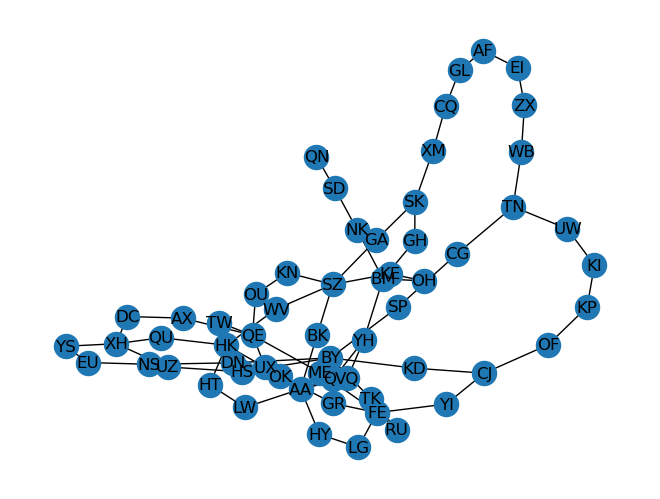

In [16]:
ntx.draw(G, with_labels=True)

In [17]:
#Test shortest path
print(ntx.shortest_path(G,'AA','DD'))
print(ntx.shortest_path(G,'AA', 'HH'))

NodeNotFound: Either source AA or target DD is not in G

These lists will be useful later

In [18]:
closed_valves_sorted = valves_to_rate.copy()
#Sorted by rel value
closed_valves_sorted = sorted(closed_valves_sorted,key=lambda x: x[1], reverse=True)
closed_valves_sorted

[['QN', 25],
 ['BM', 24],
 ['NS', 23],
 ['XH', 22],
 ['CJ', 21],
 ['KI', 20],
 ['CQ', 18],
 ['EI', 17],
 ['TN', 16],
 ['SK', 14],
 ['BY', 11],
 ['SZ', 6],
 ['HK', 5],
 ['FE', 4],
 ['QE', 3],
 ['UX', 0],
 ['HY', 0],
 ['BK', 0],
 ['GR', 0],
 ['OH', 0],
 ['DC', 0],
 ['YS', 0],
 ['KP', 0],
 ['LG', 0],
 ['NK', 0],
 ['EU', 0],
 ['OF', 0],
 ['TW', 0],
 ['GL', 0],
 ['OU', 0],
 ['GA', 0],
 ['ZX', 0],
 ['ME', 0],
 ['AX', 0],
 ['LW', 0],
 ['KN', 0],
 ['HS', 0],
 ['RU', 0],
 ['AF', 0],
 ['YI', 0],
 ['HT', 0],
 ['WV', 0],
 ['TK', 0],
 ['GH', 0],
 ['CG', 0],
 ['AA', 0],
 ['SP', 0],
 ['XM', 0],
 ['DN', 0],
 ['OK', 0],
 ['YH', 0],
 ['UZ', 0],
 ['KE', 0],
 ['Q ', 0],
 ['QU', 0],
 ['WB', 0],
 ['UW', 0],
 ['SD', 0],
 ['KD', 0]]

In [19]:
#Create a sorted list where valves with zero have been removed
closed_valves_to_open = closed_valves_sorted.copy()
for it in closed_valves_sorted:
    if it[1]==0:
        closed_valves_to_open.remove(it)

#Create a list of valves not to try open
closed_valves_keep_closed = []
for v0 in closed_valves_sorted:
    if v0[1]==0:
        closed_valves_keep_closed.append(v0)

print(closed_valves_to_open)
print()
print(closed_valves_keep_closed)

[['QN', 25], ['BM', 24], ['NS', 23], ['XH', 22], ['CJ', 21], ['KI', 20], ['CQ', 18], ['EI', 17], ['TN', 16], ['SK', 14], ['BY', 11], ['SZ', 6], ['HK', 5], ['FE', 4], ['QE', 3]]

[['UX', 0], ['HY', 0], ['BK', 0], ['GR', 0], ['OH', 0], ['DC', 0], ['YS', 0], ['KP', 0], ['LG', 0], ['NK', 0], ['EU', 0], ['OF', 0], ['TW', 0], ['GL', 0], ['OU', 0], ['GA', 0], ['ZX', 0], ['ME', 0], ['AX', 0], ['LW', 0], ['KN', 0], ['HS', 0], ['RU', 0], ['AF', 0], ['YI', 0], ['HT', 0], ['WV', 0], ['TK', 0], ['GH', 0], ['CG', 0], ['AA', 0], ['SP', 0], ['XM', 0], ['DN', 0], ['OK', 0], ['YH', 0], ['UZ', 0], ['KE', 0], ['Q ', 0], ['QU', 0], ['WB', 0], ['UW', 0], ['SD', 0], ['KD', 0]]


# Testing algorithm (optional)

TODO: create algorithm to find optimal circuit for max score in 30 days

In [20]:
current_loc = 'AA'
nminutes = 0

#press_rel_total=0 #use score instead

open_valves_add = 0

In [21]:
scoremax=0
press_rel_total=0

In [22]:
#Test going to first destination
newdest_item = closed_valves_sorted[0]
newdest_str = newdest_item[0]

In [23]:
#How far is it?
paths = ntx.shortest_path(G,current_loc, closed_valves_sorted[0][0])
dist = len(paths)
dist

6

In [24]:
#Move to new destination ignoring valves on the way
nminutes+=dist #each edge takes one minute
press_rel_total+= dist*open_valves_add #Opened valves keep releasing

print(nminutes)
print(press_rel_total)

6
0


In [26]:
#Open the valve
# The process here is to create a new list of closed valves with this valve removed
closed_valves_new = closed_valves_sorted.copy()
closed_valves_new.remove(newdest_item)

In [27]:
closed_valves_new

[['JJ', 21],
 ['DD', 20],
 ['BB', 13],
 ['EE', 3],
 ['CC', 2],
 ['AA', 0],
 ['FF', 0],
 ['GG', 0],
 ['II', 0]]

In [28]:
#update the pressure being released and minutes
#Don't update score yet
nminutes+=1
press_rel_total+= newdest_item[1]


In [29]:
#check nminutes is not over 30
nminutes

7

In [30]:
#If below 30 check if score is over the current score maximum (global)
# and continue with the new list


# Search algorithm (not working)

TODO: Run this algorithm recursively

Create a function that accepts currentlocation, closedvalvelist , nminutes, current score (press_rel_total)

All other variables are global

In [18]:
# This algorithm takes long, produces too much text and is giving wrong results
def decideFromCurLoc(cur_loc0, closed_valves0, nminutes0, press_rel_per_min0, press_rel_total0,route0):
    print(f"Minutes {nminutes0}, Current location {cur_loc0}")
    print(f"Closed valves to explore: {closed_valves0}")
    
    global scoremax
    
    route1=route0.copy()

    if nminutes0>=30:
        print("Reached maximum 30 minutes.")
        scoremax=max(scoremax,press_rel_total0)
        print(f"Route taken was {route1}")
        print(f"Pressure released in this route was: {press_rel_total0}, current max in {scoremax}")

        return

    for newdest_item in closed_valves0:
        press_rel_total1=press_rel_total0
        press_rel_per_min1=press_rel_per_min0

        newdest_str = newdest_item[0]

        #How far is it?
        paths = ntx.shortest_path(G,cur_loc0, newdest_str)
        dist = len(paths)

        print(f"Minutes {nminutes0}. Moving from {cur_loc0} to {newdest_str}, path {paths}, takes {dist} mins")

        nminutes1 = nminutes0
        if dist+nminutes1>30: #not sure if i should use 31
            nminutes1=30
            press_rel_total1+=(30-nminutes1)*press_rel_per_min1
            
            print(f"Reached 30mins. Score {press_rel_total1}")
            #break #don't try to open more valves, and exit
        else:
            nminutes1+=dist #each edge takes one minute
            press_rel_total1+= dist*press_rel_per_min1 #Opened valves keep releasing

            route1.append(newdest_str)
            
        if nminutes1<30:
            #open the valve at new location
            closed_valves_new = closed_valves0.copy()
            closed_valves_new.remove(newdest_item)
            press_rel_per_min1+= newdest_item[1]
            nminutes1+=1

            print(f"Minutes {nminutes1}, Opened valve {newdest_str}, adding release by {newdest_item[1]} to pressure-release-per-minute = {press_rel_per_min1}")
            
            #recursion in this location
            decideFromCurLoc(newdest_str, closed_valves_new, nminutes1, press_rel_per_min1, press_rel_total1, route1)
        else:
            print(f"Reached 30mins. Score {press_rel_total1}")
    

In [24]:
def decideFromCurLoc_nodebug(cur_loc0, closed_valves0, nminutes0, press_rel_per_min0, press_rel_total0,route0):
    #print(f"Minutes {nminutes0}, Current location {cur_loc0}")
    #print(f"Closed valves to explore: {closed_valves0}")
    
    global scoremax
    
    route1=route0.copy()

    if nminutes0>=30:
        #print("Reached maximum 30 minutes.")
        scoremax=max(scoremax,press_rel_total0)
        #print(f"Route taken was {route1}")
        #print(f"Pressure released in this route was: {press_rel_total0}, current max in {scoremax}")

        return

    for newdest_item in closed_valves0:
        press_rel_total1=press_rel_total0
        press_rel_per_min1=press_rel_per_min0

        newdest_str = newdest_item[0]

        #How far is it?
        paths = ntx.shortest_path(G,cur_loc0, newdest_str)
        dist = len(paths)

        #print(f"Minutes {nminutes0}. Moving from {cur_loc0} to {newdest_str}, path {paths}, takes {dist} mins")

        nminutes1 = nminutes0
        if dist+nminutes1>30: #not sure if i should use 31
            nminutes1=30
            press_rel_total1+=(30-nminutes1)*press_rel_per_min1
            
            #print(f"Reached 30mins. Score {press_rel_total1}")
            #break #don't try to open more valves, and exit
        else:
            nminutes1+=dist #each edge takes one minute
            press_rel_total1+= dist*press_rel_per_min1 #Opened valves keep releasing

            route1.append(newdest_str)
            
        if nminutes1<30:
            #open the valve at new location
            closed_valves_new = closed_valves0.copy()
            closed_valves_new.remove(newdest_item)
            press_rel_per_min1+= newdest_item[1]
            nminutes1+=1

            #print(f"Minutes {nminutes1}, Opened valve {newdest_str}, adding release by {newdest_item[1]} to pressure-release-per-minute = {press_rel_per_min1}")
            
            #recursion in this location
            decideFromCurLoc_nodebug(newdest_str, closed_valves_new, nminutes1, press_rel_per_min1, press_rel_total1, route1)
        else:
            #print(f"Reached 30mins. Score {press_rel_total1}")
            pass
    

Try to execute

In [21]:
#Test using the example in the question
route_test = ['DD', 'BB', 'JJ', 'HH', 'EE', 'CC', 'AA','FF','GG', 'II']
closed_valves_test=[]
for r0 in route_test:
    closed_valves_test.append([r0, valves_to_rate_dict[r0]])
closed_valves_test

[['DD', 20],
 ['BB', 13],
 ['JJ', 21],
 ['HH', 22],
 ['EE', 3],
 ['CC', 2],
 ['AA', 0],
 ['FF', 0],
 ['GG', 0],
 ['II', 0]]

In [22]:
len(closed_valves_test)

10

In [25]:
scoremax=0
#decideFromCurLoc('AA',closed_valves_test,nminutes0=0, press_rel_per_min0=0, press_rel_total0=0, route0=['AA'])
decideFromCurLoc_nodebug('AA',closed_valves_test,nminutes0=0, press_rel_per_min0=0, press_rel_total0=0, route0=['AA'])

In [26]:
scoremax

1186

In [ ]:
#Create a sorted list where valves with zero have been removed
closed_valves_to_open = closed_valves.copy()
for it in closed_valves:
    if it[1]==0:
        closed_valves_to_open.remove(it)

In [ ]:
closed_valves_to_open

In [ ]:
scoremax=0
#decideFromCurLoc('AA',closed_valves_to_open,nminutes0=0, press_rel_per_min0=0, press_rel_total0=0, route0=['AA'])
decideFromCurLoc('AA',closed_valves_to_open,nminutes0=0, press_rel_per_min0=0, press_rel_total0=0, route0=['AA'])

In [ ]:
scoremax

# Algorithm using permutations

First need to create a function that, given a suggested route, calculates the score

In [51]:
def calcScoreForRoute(route):
    #Format ['AA', 'BB', 'CC',...]
    #start at 'AA'
    loc0 = 'AA'

    nminutes = 1
    press_rel_per_min = 0
    press_rel_total=0
    route_followed=['AA'] #Starts at 'AA'

    for iloc1, loc1 in enumerate(route):
        
        print(f"Minute {nminutes}. Move from {loc0} to {loc1}")

        paths = ntx.shortest_path(G,loc0, loc1)
        dist = len(paths)-1
        
        nmoves=dist
        if dist+nminutes>30:
            print("Cannot go that far.")
            nmoves = 30-nminutes+1

        nminutes+=nmoves

        press_rel_total+=nmoves*press_rel_per_min

        route_followed.extend(paths[1:nmoves+1]) #may give error on the +1
        print(f"Path followed {paths[:nmoves+1]}, took {nmoves} minutes.")
        print(f"...releasing {press_rel_per_min} per minute")

        if nminutes<30:
            #Assume it arrived at destination
            #Additional minute to open valve
            press_rel_total+= press_rel_per_min #Note that new gas is not released here

            rel_addit = valves_to_rate_dict[loc1]
            print(f"Minute {nminutes}. Open valve {loc1}, releasing additional {rel_addit}")
            print(f"Released {press_rel_per_min} in this minute")
            press_rel_per_min+=rel_addit
            nminutes+=1

        if nminutes>=30:
            print(f"Finished route with score {press_rel_total}")
            print(f"Complete route is {route_followed}")
            break
        
        loc0=loc1
    
    if nminutes<30:
        print("Did not complete the 30mins. Stay here and let release the pressure")
        nmins_remain = 31-nminutes
        press_rel_total+= press_rel_per_min*nmins_remain

        print(f"Finished route with score {press_rel_total}")
        print(f"Complete route is {route_followed}")
    
    return press_rel_total


In [24]:
def calcScoreForRoute_nodebug1(route1):
    #Format ['AA', 'BB', 'CC',...]
    #start at 'AA'
    loc0 = 'AA'

    nminutes = 1
    press_rel_per_min = 0
    press_rel_total=0
    route_followed=['AA'] #Starts at 'AA'

    for loc1,releas1 in route1:
        
        #print(f"Minute {nminutes}. Move from {loc0} to {loc1}")

        paths = ntx.shortest_path(G,loc0, loc1)
        dist = len(paths)-1
        
        nmoves=dist
        if dist+nminutes>30:
            #print("Cannot go that far.")
            nmoves = 30-nminutes+1

        nminutes+=nmoves

        press_rel_total+=nmoves*press_rel_per_min

        route_followed.extend(paths[1:nmoves+1]) #may give error on the +1
        #print(f"Path followed {paths[:nmoves+1]}, took {nmoves} minutes.")
        #print(f"...releasing {press_rel_per_min} per minute")

        if nminutes<30:
            #Assume it arrived at destination
            #Additional minute to open valve
            press_rel_total+= press_rel_per_min #Note that new gas is not released here

            rel_addit = valves_to_rate_dict[loc1]
            #print(f"Minute {nminutes}. Open valve {loc1}, releasing additional {rel_addit}")
            #print(f"Released {press_rel_per_min} in this minute")
            press_rel_per_min+=rel_addit
            nminutes+=1

        if nminutes>=30:
            #print(f"Finished route with score {press_rel_total}")
            #print(f"Complete route is {route_followed}")
            break
        
        loc0=loc1
    
    if nminutes<30:
        #print("Did not complete the 30mins. Stay here and let release the pressure")
        nmins_remain = 31-nminutes
        press_rel_total+= press_rel_per_min*nmins_remain

        #print(f"Finished route with score {press_rel_total}")
        #print(f"Complete route is {route_followed}")
    
    return press_rel_total

In [52]:
#Test with route in question
#route_test = ['DD', 'BB', 'JJ', 'HH', 'EE', 'CC', 'AA','FF','GG', 'II']
route_test = ['DD', 'BB', 'JJ', 'HH', 'EE', 'CC']
calcScoreForRoute(route_test)

Minute 1. Move from AA to DD
Path followed ['AA', 'DD'], took 1 minutes.
...releasing 0 per minute
Minute 2. Open valve DD, releasing additional 20
Released 0 in this minute
Minute 3. Move from DD to BB
Path followed ['DD', 'AA', 'BB'], took 2 minutes.
...releasing 20 per minute
Minute 5. Open valve BB, releasing additional 13
Released 20 in this minute
Minute 6. Move from BB to JJ
Path followed ['BB', 'AA', 'II', 'JJ'], took 3 minutes.
...releasing 33 per minute
Minute 9. Open valve JJ, releasing additional 21
Released 33 in this minute
Minute 10. Move from JJ to HH
Path followed ['JJ', 'II', 'AA', 'DD', 'EE', 'FF', 'GG', 'HH'], took 7 minutes.
...releasing 54 per minute
Minute 17. Open valve HH, releasing additional 22
Released 54 in this minute
Minute 18. Move from HH to EE
Path followed ['HH', 'GG', 'FF', 'EE'], took 3 minutes.
...releasing 76 per minute
Minute 21. Open valve EE, releasing additional 3
Released 76 in this minute
Minute 22. Move from EE to CC
Path followed ['EE', 'D

1651

Result with test data should be 1651 which appears to give the rigth answer

Try running with all permutations of `closed_valves_to_open`

In [26]:
closed_valves_to_open

[['HH', 22], ['JJ', 21], ['DD', 20], ['BB', 13], ['EE', 3], ['CC', 2]]

In [28]:
import itertools
#try_routes_permutations = list(itertools.permutations(closed_valves_to_open))
try_routes_permutations_iter = itertools.permutations(closed_valves_to_open)
#Too many for 15 elements!!

In [29]:
#try_routes_permutations

In [30]:
#len(try_routes_permutations)

In [36]:
#try_routes_permutations_scores = [ calcScoreForRoute_nodebug1(r)  for r in try_routes_permutations]
try_routes_permutations_scores = [ calcScoreForRoute_nodebug1(r)  for r in try_routes_permutations_iter]

In [37]:
try_routes_permutations_scores

[]

In [38]:
np.max(np.array(try_routes_permutations_scores))

ValueError: zero-size array to reduction operation maximum which has no identity

# search algorithm 2

Go from non-opened valve to non-opened valve

Keep track of remaining minutes, rather than elapsed minutes

Once valve is open, its contribution to the final total pressure is remaining_minutes*valve_value

Contributions add-up

Write function:
From a valve location, search for possible destinations.

Calculate score for each and collect the maximum only
To calcualate score in each destination, call this function recursively and passing closed valves info.

Return maximum

In [20]:
closed_valves_to_open

[['QN', 25],
 ['BM', 24],
 ['NS', 23],
 ['XH', 22],
 ['CJ', 21],
 ['KI', 20],
 ['CQ', 18],
 ['EI', 17],
 ['TN', 16],
 ['SK', 14],
 ['BY', 11],
 ['SZ', 6],
 ['HK', 5],
 ['FE', 4],
 ['QE', 3]]

In [21]:
# This algorithm takes long, produces too much text and is giving wrong results
def getMaxPressContribFromValveWithStatus(cur_loc0, closed_valves0, minutes_remain0):

    #print(f"cur_loc:{cur_loc0}, minutes_remain:{minutes_remain0}, closed_valves:{closed_valves0}")
    MaxPressContrib=0

    #press_contib=0

    for v0 in closed_valves0:
        #Get dist
        paths = ntx.shortest_path(G,cur_loc0, v0[0]) #Warning can be slow if running often
        dist = len(paths)-1
        minutes_remain1 = minutes_remain0-dist-1

        if minutes_remain1>0:
            #Continue only if valve can be opened after moving the distance
            
            #Get Pressure contribution to the total if the valve is opened after moving
            press_contrib = minutes_remain1 * v0[1]

            #Add if going to next valve (recursive)
            closed_valves1 = closed_valves0.copy()
            closed_valves1.remove(v0)
            cur_loc1 = v0[0]
            #minutes_remain1-=1
            press_contrib += getMaxPressContribFromValveWithStatus( cur_loc1 , closed_valves1, minutes_remain1)
        
            MaxPressContrib = max(MaxPressContrib, press_contrib)

    return MaxPressContrib

In [22]:
getMaxPressContribFromValveWithStatus('AA', closed_valves_to_open, 30)

2077

OK